# Optimization, Newton Methods, & Profit Maximization

### Import relevant packages

In [1]:
import sympy as sm
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation

from optimization import newton_method, gradient_descent, constrained_newton_method


## Part 1: Basic Optimization Theory

### Gradient Descent

In [2]:
## Gradient Descent Visualization

x  = sm.symbols('x')

function = 3*x**2 + 2*x - 24

symbols = [x]
x0 = {x:3}

GD_values = gradient_descent(function,symbols,x0,iterations=20)

Starting Values: [3]
Step 1: [1.]
Step 2: [0.2]
Step 3: [-0.12]
Step 4: [-0.248]
Step 5: [-0.2992]
Step 6: [-0.31968]
Step 7: [-0.327872]
Step 8: [-0.3311488]
Step 9: [-0.33245952]
Step 10: [-0.33298381]
Step 11: [-0.33319352]
Step 12: [-0.33327741]
Step 13: [-0.33331096]
Step 14: [-0.33332439]
Step 15: [-0.33332975]
Step 16: [-0.3333319]

Convergence Achieved (17 iterations): Solution = {x: -0.3333327606710272}


### Newton Method

In [3]:
## Optimization

x, y  = sm.symbols('x y')

function = 100*(y-x**2)**2 + (1-x)**2

symbols = [x,y]
x0 = {x:-1.2,y:1}

NM_values = newton_method(function,symbols,x0,iterations=20)

Starting Values: [-1.2  1. ]
Step 1: [-1.1752809   1.38067416]
Step 2: [ 0.76311487 -3.17503385]
Step 3: [0.76342968 0.58282478]
Step 4: [0.99999531 0.94402732]
Step 5: [0.9999957  0.99999139]
Step 6: [1. 1.]

Convergence Achieved (7 iterations): Solution = {x: 1.0, y: 1.0}


## Part 2: Constrained Optimization Theory

### Lagrangian 

In [4]:
## Optimization

x, y, L  = sm.symbols('x y L')

Lagrangian = 100*(y-x**2)**2 + (1-x)**2 - L*(x**2-y-2)

Gamma = [x,y,L]
Gamma0 = {x:-1.2,y:1,L:1}

L_values = newton_method(Lagrangian,Gamma,Gamma0)

Starting Values: [-1.2  1.   1. ]
Step 1: [ -1.175  -0.62  400.   ]
Step 2: [  0.75833333  -5.16270833 400.        ]
Step 3: [  0.75865618  -1.42444091 400.        ]
Step 4: [  0.99999497  -1.05825447 400.        ]
Step 5: [  0.99999537  -1.00000927 400.        ]
Step 6: [  1.  -1. 400.]

Convergence Achieved (7 iterations): Solution = {x: 1.0, y: -1.0, L: 400.0}


### Logarithmic Barrier Function

In [5]:
## Optimization

x, y, rho = sm.symbols('x y rho')

function = 100*(y-x**2)**2 + (1-x)**2 - rho*sm.log((-x)*(y-3))

# Function requires last symbol to be rho!
symbols = [x,y,rho]
x0 = {x:-15,y:15,rho:10}

barrier_values = constrained_newton_method(function,symbols,x0,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [-15  15]
Convergence Achieved (17 iterations): Solution = {x: -3.739756319373101, y: 13.990326783551538}

Step 2 w/ {rho: 9.0}
Starting Values: [-3.73975632 13.99032678]
Convergence Achieved (5 iterations): Solution = {x: -3.5651000852143717, y: 12.714570834578089}

Step 3 w/ {rho: 8.1}
Starting Values: [-3.56510009 12.71457083]
Convergence Achieved (5 iterations): Solution = {x: -3.402264760327976, y: 11.58012570993156}

Step 4 w/ {rho: 7.29}
Starting Values: [-3.40226476 11.58012571]
Convergence Achieved (5 iterations): Solution = {x: -3.250794181169271, y: 10.572476293185266}

Step 5 w/ {rho: 6.561}
Starting Values: [-3.25079418 10.57247629]
Convergence Achieved (5 iterations): Solution = {x: -3.1102458335536602, y: 9.678541146019919}

Step 6 w/ {rho: 5.9049000000000005}
Starting Values: [-3.11024583  9.67854115]
Convergence Achieved (5 iterations): Solution = {x: -2.9801849149853936, y: 8.886517741371454}

Step 7 w/ {rho: 5.3144100000000005}
St

### Putting them together

In [6]:
## Optimization

x, y, L, rho = sm.symbols('x y L rho')

function = 100*(y-x**2)**2 + (1-x)**2 + L*(x**2-y-2) - rho*sm.log((-x)*(y-3))

# Function requires last symbol to be rho!
symbols = [x,y,L,rho]
x0 = {x:-15,y:15,L:0,rho:10}

combined_values = constrained_newton_method(function,symbols,x0,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [-15  15   0]
Convergence Achieved (15 iterations): Solution = {x: -3.9631764104337135, y: 13.706767260218255, L: -400.93398873413037}

Step 2 w/ {rho: 9.0}
Starting Values: [  -3.96317641   13.70676726 -400.93398873]
Convergence Achieved (5 iterations): Solution = {x: -3.802167311247783, y: 12.456476262721091, L: -400.951728714794}

Step 3 w/ {rho: 8.1}
Starting Values: [  -3.80216731   12.45647626 -400.95172871]
Convergence Achieved (5 iterations): Solution = {x: -3.6534890867704632, y: 11.347982507150826, L: -400.97029431878434}

Step 4 w/ {rho: 7.29}
Starting Values: [  -3.65348909   11.34798251 -400.97029432]
Convergence Achieved (5 iterations): Solution = {x: -3.5166013015724937, y: 10.366484714221338, L: -400.9896172031588}

Step 5 w/ {rho: 6.561}
Starting Values: [  -3.5166013    10.36648471 -400.9896172 ]
Convergence Achieved (5 iterations): Solution = {x: -3.3909548710786486, y: 9.498574937692009, L: -401.0096059617542}

Step 6 w/ {rho: 5.

## Part 3: Econometric Profit Maximization

In [61]:
def quantity_ar2_process(T, 𝛼1, 𝛼2, u, df, params):

    A = np.identity(T)  # The T x T identity matrix

    for i in range(T):

        if i-1 >= 0:
            A[i, i-1] = -𝛼1

        if i-2 >= 0:
            A[i, i-2] = -𝛼2

    b = np.array(df) @ params

    return np.linalg.solve(A, b+u)

In [62]:
df = pd.DataFrame()


# Digital Advertising 
df['log_digital_advertising'] = np.log(np.random.normal(loc=50000,scale=15000,size=50).round())
df['log_digital_advertising_lag1'] = df['log_digital_advertising'].shift(1)
df['log_digital_advertising_lag2'] = df['log_digital_advertising'].shift(2)

# Television Advertising
df['log_television_advertising'] = np.log(np.random.normal(loc=50000,scale=15000,size=50).round())
df['log_television_advertising_lag1'] = df['log_television_advertising'].shift(1)
df['log_television_advertising_lag2'] = df['log_television_advertising'].shift(2)

# Price
df['price'] = np.random.normal(loc=180,scale=15,size=50).round()
df['price_lag1'] = df['price'].shift(1)
df['price_lag2'] = df['price'].shift(2)

# Competitor Price
df['comp_price'] = np.random.normal(loc=120,scale=15,size=50).round()
df['comp_price_lag1'] = df['comp_price'].shift(1)
df['comp_price_lag2'] = df['comp_price'].shift(2)

# Season 
from itertools import cycle
months = cycle(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
df['months'] = [next(months) for m in range(len(df))]

one_hot = pd.get_dummies(df['months'])
one_hot = one_hot[['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']]
df = df.join(one_hot).drop('months',axis=1)

# Constant
df['constant'] = 1

# Drop NaN
df = df.dropna()

df

,log_digital_advertising,log_digital_advertising_lag1,log_digital_advertising_lag2,log_television_advertising,log_television_advertising_lag1,log_television_advertising_lag2,price,price_lag1,price_lag2,comp_price,...,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,constant
2,10.635278,10.277015,11.042794,10.868378,10.889883,10.099424,184.0,195.0,172.0,126.0,...,0,0,0,0,0,0,0,0,0,1
3,10.658811,10.635278,10.277015,11.273093,10.868378,10.889883,185.0,184.0,195.0,142.0,...,1,0,0,0,0,0,0,0,0,1
4,10.178806,10.658811,10.635278,10.348173,11.273093,10.868378,155.0,185.0,184.0,112.0,...,0,1,0,0,0,0,0,0,0,1
5,10.950298,10.178806,10.658811,11.399129,10.348173,11.273093,172.0,155.0,185.0,120.0,...,0,0,1,0,0,0,0,0,0,1
6,10.317714,10.950298,10.178806,11.133494,11.399129,10.348173,168.0,172.0,155.0,124.0,...,0,0,0,1,0,0,0,0,0,1
7,10.536725,10.317714,10.950298,11.086196,11.133494,11.399129,170.0,168.0,172.0,126.0,...,0,0,0,0,1,0,0,0,0,1
8,11.004563,10.536725,10.317714,11.033146,11.086196,11.133494,188.0,170.0,168.0,104.0,...,0,0,0,0,0,1,0,0,0,1
9,10.690626,11.004563,10.536725,9.964018,11.033146,11.086196,207.0,188.0,170.0,103.0,...,0,0,0,0,0,0,1,0,0,1
10,10.825820,10.690626,11.004563,11.058858,9.964018,11.033146,184.0,207.0,188.0,122.0,...,0,0,0,0,0,0,0,1,0,1
11,10.371395,10.825820,10.690626,10.031177,11.058858,9.964018,168.0,184.0,207.0,141.0,...,0,0,0,0,0,0,0,0,1,1


In [63]:
params = np.array(
    [10_000,
    5_000,
    2_000,
    6_000,
    3_000,
    1_000,
    -1_000,
    -500,
    -100,
    500,
    300,
    100,
    25_000,
    15_000,
    15_000,
    10_000,
    10_000,
    10_000,
    15_000,
    15_000,
    25_000,
    35_000,
    35_000,
    40_000,
    50_000
    ])


np.array(df) @ params

array([174102.78438063, 178052.10908793, 188429.37076018, 192227.01906146,
       194332.76489795, 196173.20616738, 181355.648817  , 149272.2697331 ,
       171998.80563001, 209251.95813295, 183166.60636935, 176097.40333983,
       169592.70564098, 159131.04713443, 180505.91032569, 187686.58190181,
       208318.57604442, 201875.08817633, 168061.17999372, 167364.00108537,
       196619.93200963, 206911.41657609, 192795.29787134, 189577.28228303,
       179972.88495948, 155346.20734983, 181887.76410461, 228767.50642252,
       184169.49870444, 184309.49368796, 196837.74775613, 178759.80493177,
       167446.66132427, 203325.36441336, 182186.8627474 , 132716.92238838,
       147275.16894286, 164955.87089888, 164622.3971316 , 160663.41389277,
       187132.66559741, 215476.33479941, 207884.43473215, 214039.15040997,
       209814.58123234, 191330.41830465, 172121.52544286, 185980.32398906])

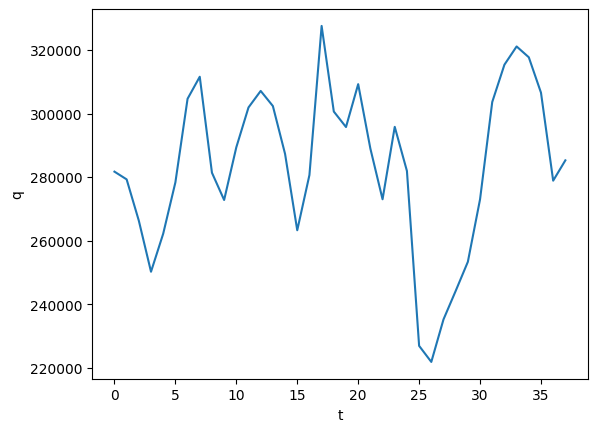

In [64]:
## Quantity Demand AR(2) component process

# parameters
T = 48
𝛼1 = 0.3
𝛼2 = 0.05
u = np.random.normal(0, 5000, size=T)

quantity_demanded_ar = quantity_ar2_process(T,𝛼1,𝛼2,u,df,params)

plt.plot(np.arange(38), quantity_demanded_ar[10:])
plt.xlabel('t')
plt.ylabel('q')

plt.show()

In [65]:
df['quantity_demanded'] = quantity_demanded_ar
df['quantity_demanded_lag1'] = df['quantity_demanded'].shift(1)
df['quantity_demanded_lag2'] = df['quantity_demanded'].shift(2)

df.columns

Index(['log_digital_advertising', 'log_digital_advertising_lag1',
       'log_digital_advertising_lag2', 'log_television_advertising',
       'log_television_advertising_lag1', 'log_television_advertising_lag2',
       'price', 'price_lag1', 'price_lag2', 'comp_price', 'comp_price_lag1',
       'comp_price_lag2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'constant', 'quantity_demanded',
       'quantity_demanded_lag1', 'quantity_demanded_lag2'],
      dtype='object')

In [66]:
# Build Symbolic Functions with all variables in function (ESTIMATE HERE WITH REGRESSION)
delta, tau, L, rho  = sm.symbols('delta tau L rho')

log_digital_advertising_lag1 = df['log_digital_advertising_lag1'].iloc[-1]
log_digital_advertising_lag2 = df['log_digital_advertising_lag2'].iloc[-1]
log_television_advertising_lag1 = df['log_television_advertising_lag1'].iloc[-1]
log_television_advertising_lag2 = df['log_television_advertising_lag2'].iloc[-1]
price = 180
price_lag1 = df['price_lag1'].iloc[-1]
price_lag2 = df['price_lag2'].iloc[-1]
comp_price = 120
comp_price_lag1 = df['comp_price_lag1'].iloc[-1]
comp_price_lag2 = df['comp_price_lag2'].iloc[-1]
Jan = 1
quantity_demanded_lag1 = df['quantity_demanded_lag1'].iloc[-1]
quantity_demanded_lag2 = df['quantity_demanded_lag2'].iloc[-1]


vars = [sm.log(delta),
        log_digital_advertising_lag1,
        log_digital_advertising_lag2,
        sm.log(tau),
        log_television_advertising_lag1,
        log_television_advertising_lag2,
        price,
        price_lag1,
        price_lag2,
        comp_price,
        comp_price_lag1,
        comp_price_lag2,
        Jan,0,0,0,0,0,0,0,0,0,0,0,
        1,
        quantity_demanded_lag1,
        quantity_demanded_lag2
        ]

params = np.array(
    [10_000,
    5_000,
    2_000,
    6_000,
    3_000,
    1_000,
    -1_000,
    -500,
    -100,
    500,
    300,
    100,
    25_000,
    15_000,
    15_000,
    10_000,
    10_000,
    10_000,
    15_000,
    15_000,
    25_000,
    35_000,
    35_000,
    40_000,
    50_000,
    0.3,
    0.05
    ])

# Quantity
quantity_demanded = np.array([vars]) @ params
quantity_demanded = quantity_demanded[0]

In [67]:
## Profit Function 

prod_cost = 140 - 0.0001*quantity_demanded
Revenue = price * quantity_demanded
Cost = quantity_demanded * prod_cost + tau + delta
profit = Revenue - Cost

In [68]:
profit

-delta - tau - (-1.0*log(delta) - 0.6*log(tau) + 129.260314413053)*(10000.0*log(delta) + 6000.0*log(tau) + 107396.855869465) + 1800000.0*log(delta) + 1080000.0*log(tau) + 19331434.0565038

In [55]:
## Optimization Problem

objective = -profit + L*(tau + delta - 100_000) - rho*sm.log((tau-10_000)*(delta-10_000))

symbols = [delta, tau, L, rho]
x0 = {delta:25_000, tau:75_000, L:0, rho:10}

results = constrained_newton_method(objective,symbols,x0,iterations=20,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [25000 75000     0]
Convergence Achieved (6 iterations): Solution = {delta: 62499.746501077345, tau: 37500.253498922655, L: 15.009603184150011}

Step 2 w/ {rho: 9.0}
Starting Values: [6.24997465e+04 3.75002535e+04 1.50096032e+01]
Convergence Achieved (2 iterations): Solution = {delta: 62499.77185046847, tau: 37500.22814953153, L: 15.009577643072015}

Step 3 w/ {rho: 8.1}
Starting Values: [6.24997719e+04 3.75002281e+04 1.50095776e+01]
Convergence Achieved (2 iterations): Solution = {delta: 62499.794665015696, tau: 37500.205334984304, L: 15.009554656097542}

Step 4 w/ {rho: 7.29}
Starting Values: [6.24997947e+04 3.75002053e+04 1.50095547e+01]
Convergence Achieved (2 iterations): Solution = {delta: 62499.81519818533, tau: 37500.18480181467, L: 15.009533967817049}

Step 5 w/ {rho: 6.561}
Starting Values: [6.24998152e+04 3.75001848e+04 1.50095340e+01]
Convergence Achieved (2 iterations): Solution = {delta: 62499.83367810047, tau: 37500.16632189953, L: 15

/var/folders/56/tnwgtr1j01z62382kdlr7xlw0000gn/T/ipykernel_23124/3794960740.py:8: RuntimeWarning: divide by zero encountered in log
  profit = -delta - tau - (-1.0*np.log(delta) - 0.6*np.log(tau) + 87.0709443576701)*(10000*np.log(delta) + 6000*np.log(tau) + 29290.5564232985) + 1800000*np.log(delta) + 1080000*np.log(tau) + 5272300.15619374
/var/folders/56/tnwgtr1j01z62382kdlr7xlw0000gn/T/ipykernel_23124/3794960740.py:8: RuntimeWarning: invalid value encountered in add
  profit = -delta - tau - (-1.0*np.log(delta) - 0.6*np.log(tau) + 87.0709443576701)*(10000*np.log(delta) + 6000*np.log(tau) + 29290.5564232985) + 1800000*np.log(delta) + 1080000*np.log(tau) + 5272300.15619374


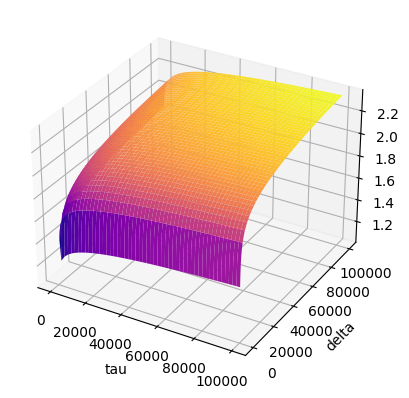

MovieWriter imagemagick unavailable; using Pillow instead.


In [32]:
## Plot

# Defining surface and axes
tau = np.outer(np.linspace(0, 100000, 1000), np.ones(1000))
delta = np.outer(np.linspace(0, 100000, 1000), np.ones(1000)).T

# quantity = 10000 - 75*price
profit = -delta - tau - (-1.0*np.log(delta) - 0.6*np.log(tau) + 87.0709443576701)*(10000*np.log(delta) + 6000*np.log(tau) + 29290.5564232985) + 1800000*np.log(delta) + 1080000*np.log(tau) + 5272300.15619374

fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel('tau')
ax.set_ylabel('delta')
ax.set_zlabel('profit')

# syntax for plotting
ax.plot_surface(tau, delta, profit, cmap ='plasma')

plt.show()

# Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/profit.gif', dpi=100, writer='imagemagick')

In [46]:
quantity = quantity_demanded.evalf(subs={delta:62500,tau:37500})
revenue = Revenue.evalf(subs={delta:62500,tau:37500})
cost = Cost.evalf(subs={delta:62500,tau:37500})
profit = revenue - cost

print(f"Quantity: {int(quantity):,}")
print(f"Total Revenue: ${round(revenue,2):,}")
print(f"Total Cost: ${round(cost,2):,}")
print(f"Profit: ${round(profit,2):,}")

Quantity: 300,292
Total Revenue: $54,052,581.22
Total Cost: $33,123,360.90
Profit: $20,929,220.32


### Backups

In [127]:
def ar2_process(T, 𝛼0, 𝛼1, 𝛼2, u, x0, x1):

    A = np.identity(T) 

    for i in range(T):

        if i-1 >= 0:
            A[i, i-1] = -𝛼1

        if i-2 >= 0:
            A[i, i-2] = -𝛼2

    b = np.full(T, 𝛼0)
    b[0] = 𝛼0 + 𝛼1 * x0 + 𝛼2 * x1
    b[1] = 𝛼0 + 𝛼2 * x0

    return np.linalg.solve(A, b+u)

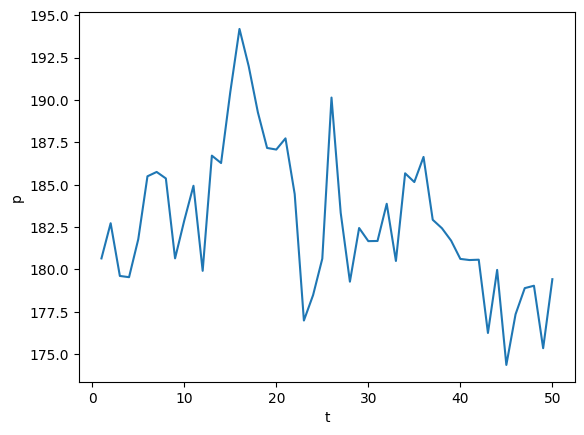

In [128]:
## Price Process

# parameters
T = 50
𝛼0 = 72
𝛼1 = 0.5
𝛼2 = 0.1
u = np.random.normal(0, 3, size=T)
p0 = 185
p1 = 175

price = ar2_process(T,𝛼0,𝛼1,𝛼2,u,p0, p1)


plt.plot(np.arange(T)+1, price)
plt.xlabel('t')
plt.ylabel('p')

plt.show()

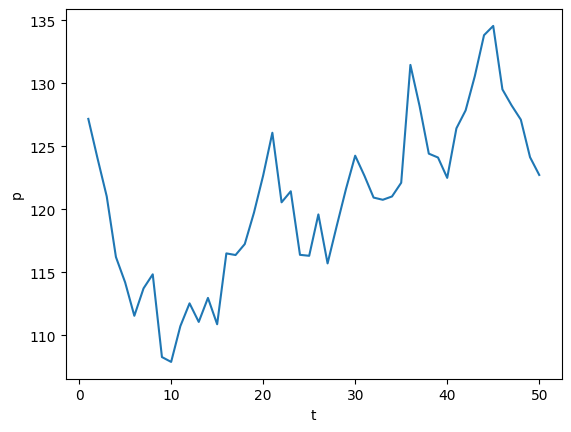

In [129]:
## Competitor Price Process

# parameters
T = 50
𝛼0 = 24
𝛼1 = 0.9
𝛼2 = -0.1
u = np.random.normal(0, 3, size=T)
p0 = 125
p1 = 115

comp_price = ar2_process(T,𝛼0,𝛼1,𝛼2,u,p0, p1)


plt.plot(np.arange(T)+1, comp_price)
plt.xlabel('t')
plt.ylabel('p')

plt.show()

In [178]:
df = pd.DataFrame()

# Digital Advertising 
df['digital_advertising'] = np.random.normal(loc=50000,scale=15000,size=50).round()
df['digital_advertising_lag1'] = df['digital_advertising'].shift(1)
df['digital_advertising_lag2'] = df['digital_advertising'].shift(2)

# Television Advertising
df['television_advertising'] = np.random.normal(loc=50000,scale=15000,size=50).round()
df['television_advertising_lag1'] = df['television_advertising'].shift(1)
df['television_advertising_lag2'] = df['television_advertising'].shift(2)

# Price
df['price'] = price
df['price_lag1'] = df['price'].shift(1)
df['price_lag2'] = df['price'].shift(2)

# Competitor Price
df['comp_price'] = comp_price
df['comp_price_lag1'] = df['comp_price'].shift(1)
df['comp_price_lag2'] = df['comp_price'].shift(2)

# Constant
df['constant'] = 1

# Drop NaN
df = df.dropna()

# df

In [179]:
def quantity_ar2_process(T, 𝛼1, 𝛼2, u, df, params):

    A = np.identity(T)  # The T x T identity matrix

    for i in range(T):

        if i-1 >= 0:
            A[i, i-1] = -𝛼1

        if i-2 >= 0:
            A[i, i-2] = -𝛼2

    b = np.array(df) @ params

    return np.linalg.solve(A, b+u)

In [180]:
df = np.log(df)
df['digital_advertising**2'] = df['digital_advertising']**2
df['television_advertising**2'] = df['television_advertising']**2

df.columns


Index(['digital_advertising', 'digital_advertising_lag1',
       'digital_advertising_lag2', 'television_advertising',
       'television_advertising_lag1', 'television_advertising_lag2', 'price',
       'price_lag1', 'price_lag2', 'comp_price', 'comp_price_lag1',
       'comp_price_lag2', 'constant', 'digital_advertising**2',
       'television_advertising**2'],
      dtype='object')

In [190]:

params = np.array(
    [0.5,
    0.2,
    0.05,
    0.3,
    0.2,
    0.07,
    -0.7,
    -0.4,
    -0.1,
    0.4,
    0.2,
    0.2,
    0,
    -0.03,
    -0.05    
    ])


np.array(df) @ params

array([3.47852335, 1.9575367 , 2.56717556, 2.49674359, 2.73401602,
       2.18467753, 2.12758834, 2.51563703, 2.71746099, 2.07116569,
       2.60627458, 2.35579395, 2.33682982, 2.39419716, 2.34641289,
       2.82858378, 2.5544026 , 2.08142991, 2.36586404, 2.6501278 ,
       2.70964241, 2.07707362, 2.63516951, 2.08072258, 2.87001633,
       2.59080756, 2.58445069, 2.18897655, 3.01710379, 3.01274077,
       2.15915168, 2.42439803, 2.34817746, 2.62326476, 2.6427325 ,
       2.72674902, 2.47521236, 2.16833315, 3.08214411, 2.54852695,
       2.41102426, 2.13490363, 2.61815857, 2.31407088, 2.81795066,
       2.83240915, 2.42379514, 2.49274597])

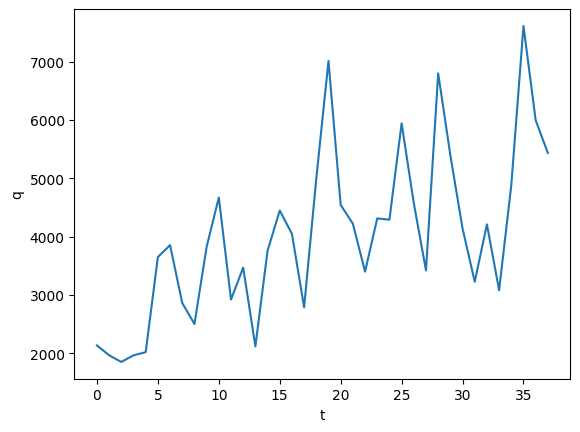

In [191]:
## Quantity Demand AR(1) component process

# parameters
T = 48
𝛼1 = 0.6
𝛼2 = 0.1
u = np.random.normal(0, 0.1, size=T)

quantity_demanded_ar = np.exp(quantity_ar2_process(T,𝛼1,𝛼2,u,df,params))

plt.plot(np.arange(38), quantity_demanded_ar[10:])
plt.xlabel('t')
plt.ylabel('q')

plt.show()

In [214]:
delta, tau, L, rho  = sm.symbols('delta tau L rho')

comp_price = np.log(120)
comp_price_lag1 = df['comp_price_lag1'].iloc[-1]
comp_price_lag2 = df['comp_price_lag2'].iloc[-1]
price = np.log(180)
price_lag1 = df['price_lag1'].iloc[-1]
price_lag2 = df['price_lag2'].iloc[-1]

digital_advertising_lag1 = df['digital_advertising_lag1'].iloc[-1]
digital_advertising_lag2 = df['digital_advertising_lag2'].iloc[-1]

television_advertising_lag1 = df['television_advertising_lag1'].iloc[-1]
television_advertising_lag2 = df['television_advertising_lag2'].iloc[-1]

vars = [sm.log(delta),
        digital_advertising_lag1,
        digital_advertising_lag2,
        sm.log(tau),
        television_advertising_lag1,
        television_advertising_lag2,
        price,
        price_lag1,
        price_lag2,
        comp_price,
        comp_price_lag1,
        comp_price_lag2,
        1,
        sm.log(delta)**2,
        sm.log(tau)**2
        ]

# Quantity
log_quantity_demanded = np.array([vars]) @ params
quantity_demanded = sm.exp(log_quantity_demanded[0])

In [215]:
## Profit Function 

prod_cost = 90 
Revenue = price * quantity_demanded
Cost = quantity_demanded * prod_cost + tau + delta
profit = Revenue - Cost

objective = -profit + L*(tau + delta - 100_000) - rho*sm.log((tau-10_000)*(delta-10_000)*(delta-1.5*tau))

symbols = [delta, tau, L, rho]
x0 = {delta:70_000, tau:30_000, L:0, rho:10}

results = constrained_newton_method(objective,symbols,x0,iterations=20,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [70000 30000     0]


TypeError: Cannot convert complex to float

In [216]:
print(profit)

-1838.81259185848*delta**0.5*tau**0.3*exp(-0.03*log(delta)**2 - 0.05*log(tau)**2) - delta - tau


/var/folders/56/tnwgtr1j01z62382kdlr7xlw0000gn/T/ipykernel_22309/1922477790.py:8: RuntimeWarning: divide by zero encountered in log
  profit = -1838.81259185848*delta**0.5*tau**0.3*np.exp(-0.03*np.log(delta)**2 - 0.05*np.log(tau)**2) - delta - tau


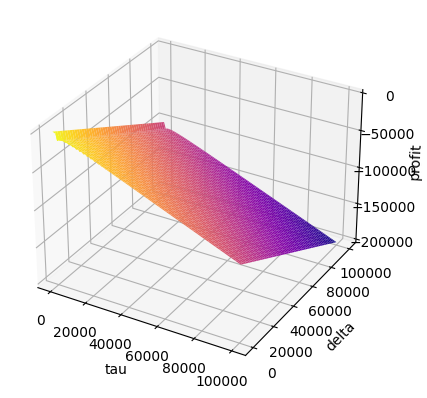

MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

In [217]:
## Plot

# Defining surface and axes
tau = np.outer(np.linspace(0, 100000, 100), np.ones(100))
delta = np.outer(np.linspace(0, 100000, 100), np.ones(100)).T

# quantity = 10000 - 75*price
profit = -1838.81259185848*delta**0.5*tau**0.3*np.exp(-0.03*np.log(delta)**2 - 0.05*np.log(tau)**2) - delta - tau

fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel('tau')
ax.set_ylabel('delta')
ax.set_zlabel('profit')

# syntax for plotting
ax.plot_surface(tau, delta, profit, cmap ='plasma')

plt.show()

# Rotating Visualization
def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation.save('Images/profit.gif', dpi=100, writer='imagemagick')

In [68]:
price_competitor1 = 50
price_competitor2 = 35
price_complement = 15
advertising_lag = 1000
price_lag = 45

price = 61.03318773  
advertising = 37926.86026785

quantity = (10000 
            +75*price_competitor1
            +50*price_competitor2
            -20*price_complement
            +0.001*advertising_lag
            -25*price_lag
            -50*price
            -2*price**2
            +0.00001*advertising
            +0.000001*advertising**2)

prod_cost = 50 - 0.0005*quantity
profit = price * quantity - quantity * prod_cost - advertising


print(f"Quantity: {round(quantity,2)}")
print(f"Total Revenue: ${round(price*quantity,2)}")
print(f"Total Cost: ${round(quantity*prod_cost+advertising,2)}")
print(f"Profit: ${round(profit,2)}")

Quantity: 5013.07
Total Revenue: $305963.44
Total Cost: $276014.77
Profit: $29948.66


## Visuals Pt. 1

### Cover Photo

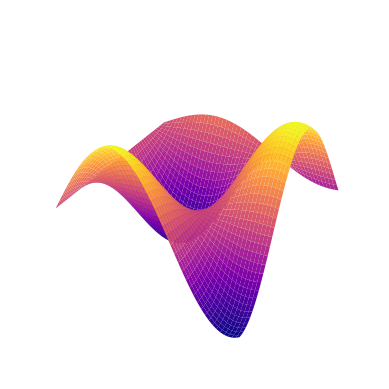

In [150]:
# Defining surface and axes
x = np.outer(np.linspace(0, 5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x)*np.cos(y)
 
# dpi=600,figsize=(10,10)
fig = plt.figure()
# fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.axis('off')
ax.grid(False)

plt.show()

In [ ]:
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/cover_rotation.gif', dpi=80, writer='imagemagick')

### Parabola Visual

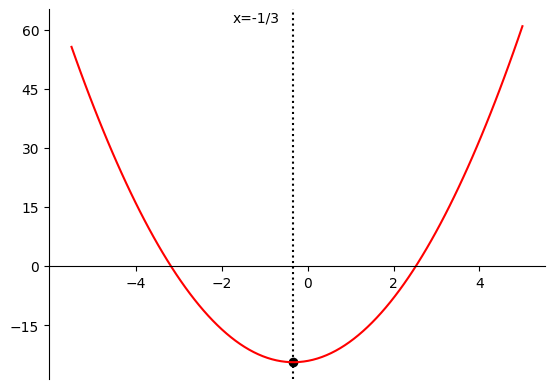

In [148]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.scatter(-1/3,  3*(-1/3)**2+2*(-1/3)-24, c='black')
plt.plot(x,y,'r')

# show the plot
plt.show()

### Gradient Descent Animation

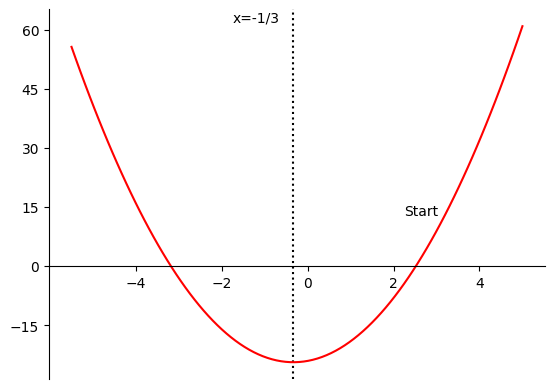

In [146]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre 
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.text(x=2.25,y=13,s="Start")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.plot(x,y,'r')

plt.show()

## Gradient Descent Animation

# x2=[]
# y2=[]

# def animate(iterations):
#     x2.append(float([v for v in GD_values[iterations].values()][0]))
#     y2.append(float(function.evalf(subs=GD_values[iterations])))
#     ax.scatter(x2, y2, c='black')

# rot_animation = animation.FuncAnimation(fig, animate, frames=len(GD_values),interval=500)

# rot_animation.save('Images/gradient_descent.gif', dpi=600)

### Rosenbrock's Parabolic Valley

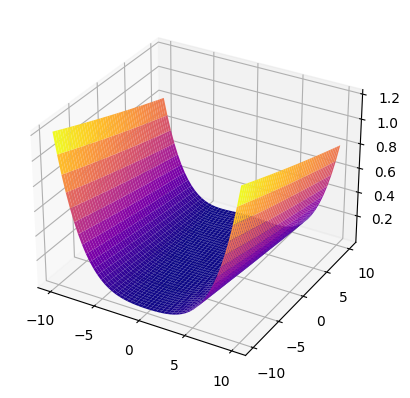

In [144]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.show()

# ## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/rotation.gif', dpi=100, writer='imagemagick')

### Newton Method Visualization

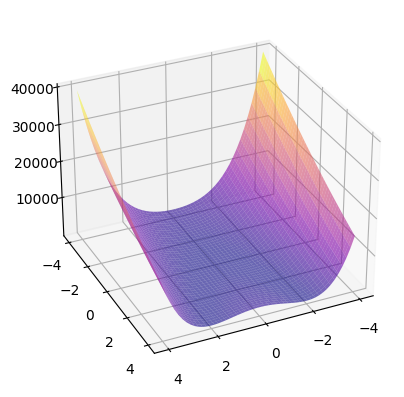

In [143]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-4, 4, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma',alpha=0.6)
ax.view_init(elev=30, azim=65)

plt.show()


# ## Newton Method Animation

# x2=[]
# y2=[]
# z2=[]

# def animate(iterations):

#     # Append & plot x and y values from optimization
#     x2.append(float([v for v in NM_values[iterations].values()][0]))
#     y2.append(float([v for v in NM_values[iterations].values()][1]))
#     z2.append(float(function.evalf(subs=NM_values[iterations])))
#     ax.scatter(x2, y2, z2, c='black')
#     ax.plot(x2, y2, z2, c='black')

# rot_animation = animation.FuncAnimation(fig, animate, frames=len(NM_values),interval=1000)

# rot_animation.save('Images/newton_method2.gif', dpi=100)

## Visuals Pt. 2

### Equality Constrained Rosenbrock's Parabolic Valley

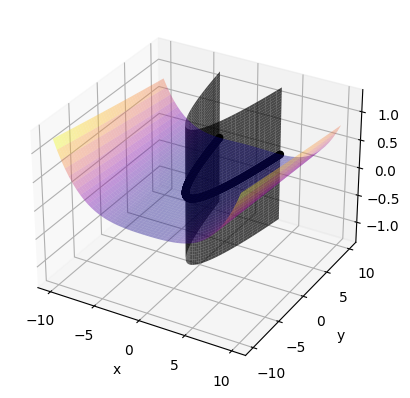

In [75]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2

# Constraint
xs = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
zs = np.linspace(-1.2e6, 1.2e6, 500)
X, Z = np.meshgrid(xs, zs)
Y = X**2 - 2

# Constraint Intersection
X2 = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
Y2 = X2**2 - 2
Z2 = 100*(Y2-X2**2)**2 + (1-X2)**2

# 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X, Y, Z,color='black',alpha=0.7,zorder=3)
ax.plot_surface(x, y, z, cmap='plasma',alpha=0.4,zorder=2)
ax.scatter(X2, Y2, Z2,color='black',alpha=1,zorder=3)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/equality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Inequality Constrained Rosenbrock's Parabolic Valley

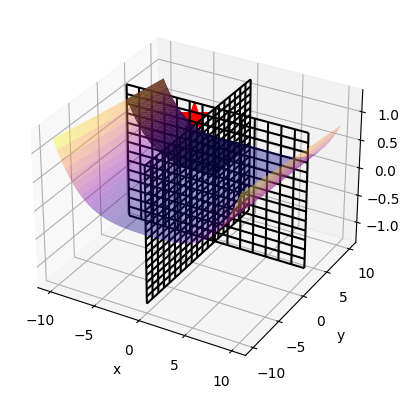

MovieWriter imagemagick unavailable; using Pillow instead.


In [74]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2

# Constraints 

# y >= 3
xc1 = np.linspace(-10, 10, 15)
zc1 = np.linspace(-1.2e6, 1.2e6, 15)
XC1, ZC1 = np.meshgrid(xc1, zc1)
YC1 = 3

# x <= 0
yc2 = np.linspace(-10, 10, 20)
zc2 = np.linspace(-1.2e6, 1.2e6, 20)
YC2, ZC2 = np.meshgrid(yc2, zc2)
XC2 = 0


# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(XC1, YC1, ZC1,color='black',alpha=1,zorder=3)
ax.plot_wireframe(XC2, YC2, ZC2,color='black',alpha=1,zorder=3)
ax.plot_surface(x, y, z, cmap='plasma',alpha=0.4,zorder=2)

feasible_region_x = [-5]
feasible_region_y = [7.5]
feasible_region_z = [0.5e6]

ax.scatter(feasible_region_x, feasible_region_y, feasible_region_z, c='red',marker='*',s=500,zorder=4)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/inequality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Logarithmic Barrier Function Examples

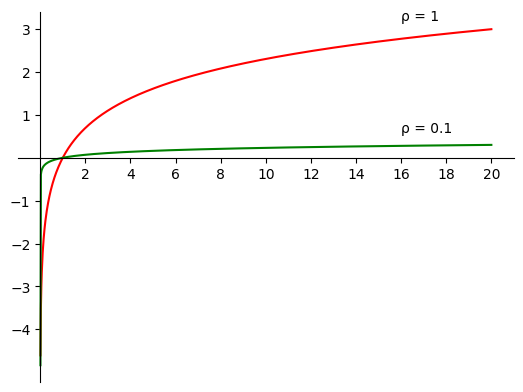

In [4]:
# Defining surface and axes
x = np.linspace(0.01, 20, 1000)
y = np.log(x)
x2 = np.linspace(0.000000000000000000001, 20, 1000)
y2 = 0.1*np.log(x2)

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_yticks([-4,-3,-2,-1,1,2,3])
ax.set_xticks([2,4,6,8,10,12,14,16,18,20])

ax.text(x=16,y=3.2,s="ρ = 1")
ax.text(x=16,y=0.6,s="ρ = 0.1")

# plot the function
plt.plot(x,y,'r')
plt.plot(x,y2,'g')

# show the plot
plt.show()